## Tiền xử lý dữ liệu

In [1]:
# Import thư viện cần thiết
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
# Tải dữ liệu bảng Lịch sử giá
df_price = pd.read_excel('Simplize_MSN_PriceHistory_20250315.xlsx', header=5, skipfooter=7)
df_price['NGÀY'] = pd.to_datetime(df_price['NGÀY'], format='%d/%m/%Y')
df_price = df_price.set_index('NGÀY')
df_price = df_price.sort_index(ascending=True)
df_price.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,GIÁ MỞ CỬA,GIÁ CAO NHẤT,GIÁ THẤP NHẤT,GIÁ ĐÓNG CỬA,THAY ĐỔI GIÁ,% THAY ĐỔI,KHỐI LƯỢNG
NGÀY,,,,,,,
2021-03-15,72061.828461,73044.489758,71488.609371,72471.270668,NaN,NaN,1188500
2021-03-16,72716.935992,72716.935992,71406.720929,72061.828461,NaN,NaN,965200
2021-03-17,71734.274695,72143.716902,71242.944046,72061.828461,NaN,NaN,576400
2021-03-18,71979.940019,73617.708848,71816.163136,73453.931965,NaN,NaN,1242500
2021-03-19,72880.712875,73208.266641,70833.501839,72635.047551,NaN,NaN,1255900


In [3]:
# Tải dữ liệu bảng Chỉ số tài chính
df_financials = pd.read_excel('Simplize_MSN_FinancialIndicator_20250315.xlsx', header=6, index_col=0)
df_financials.index = df_financials.index.str.strip()
df_financials = df_financials.loc[['Lợi nhuận gộp', 
                                 'Lợi nhuận sau thuế của Cổ đông công ty mẹ',
                                 'P/E',
                                 'EPS (VNĐ/CP)',
                                 'Tăng trưởng EPS',
                                 'ROE LTM',
                                 'Nợ phải trả / Vốn chủ sở hữu',
                                 'Khả năng thanh toán tổng quát',
                                 'Vòng quay tài sản (vòng)',
                                 'Giá trị sổ sách (VNĐ/CP)'
                                 ]]

df_financials = df_financials.T
df_financials.index.name = 'Mốc thời gian'
df_financials.head()

d:\App\Miniconda\envs\data_mining\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


CHỈ TIÊU,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP)
Mốc thời gian,,,,,,,,,,
Q4/2024,7.062540e+12,6.910550e+11,81.488515,480.449281,12.7188,0.1082,2.6215,1.381461,0.150403,21025.479196
Q3/2024,6.420610e+12,7.010710e+11,161.175910,487.412808,13.4165,0.0818,2.7467,1.364069,0.137844,20512.892433
Q2/2024,5.917750e+12,5.025770e+11,353.226688,349.411781,3.7482,0.0580,2.4079,1.415299,0.132468,23380.960262
Q1/2024,5.254838e+12,1.043560e+11,231.698926,72.552496,-0.5194,0.0503,2.7731,1.360608,0.128306,18582.803874
Q4/2023,5.767833e+12,5.011000e+10,112.360945,35.021303,-0.8885,0.0499,2.8544,1.350330,0.142120,18562.184994


In [4]:
def get_quarter_window(quarter_str):
    """
    Hàm này lấy một chuỗi quý (vd: 'Q4/2024') và trả về:
    1. end_date: Ngày cuối cùng thực tế của quý đó (vd: '2024-12-31')
    2. window_start: Ngày bắt đầu cửa sổ (end_date - 14 ngày)
    3. window_end: Ngày kết thúc cửa sổ (end_date + 14 ngày)
    """
    parts = quarter_str.split('/')
    quarter = parts[0].upper()
    year = int(parts[1])

    if quarter == 'Q1':
        end_date = pd.Timestamp(year=year, month=3, day=31)
    elif quarter == 'Q2':
        end_date = pd.Timestamp(year=year, month=6, day=30)
    elif quarter == 'Q3':
        end_date = pd.Timestamp(year=year, month=9, day=30)
    elif quarter == 'Q4':
        end_date = pd.Timestamp(year=year, month=12, day=31)
    else:
        return pd.NaT, pd.NaT, pd.NaT

    window_start = end_date - DateOffset(days=14)
    window_end = end_date + DateOffset(days=14)
    return end_date, window_start, window_end

In [5]:
# Tạo DataFrame mới để lưu trữ giá đóng cửa trung bình theo quý
price_data = []

for quarter_str in df_financials.index:
    end_date, window_start, window_end = get_quarter_window(quarter_str)
    daily_prices_in_window = df_price.loc[window_start:window_end]
    if not daily_prices_in_window.empty:
        avg_price = pd.to_numeric(daily_prices_in_window['GIÁ ĐÓNG CỬA']).mean()
        price_data.append({
            'Mốc thời gian': quarter_str,
            'Giá đóng cửa (TB Quý)': avg_price,
            'Sort': end_date
        })

df_quarter = pd.DataFrame(price_data)
df_quarter = df_quarter.set_index('Mốc thời gian')
df_quarter.head()

,Giá đóng cửa (TB Quý),Sort
Mốc thời gian,,
Q4/2024,68950.000000,2024-12-31
Q3/2024,75995.238095,2024-09-30
Q2/2024,75660.000000,2024-06-30
Q1/2024,74620.000000,2024-03-31
Q4/2023,65915.789474,2023-12-31


In [6]:
# Kết hợp dữ liệu tài chính với giá đóng cửa trung bình theo quý
df_final = df_financials.join(df_quarter, how='inner')
df_final = df_final.sort_values(by='Sort')
df_final['Thay đổi giá (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].diff()
df_final['% Thay đổi (theo Quý)'] = df_final['Giá đóng cửa (TB Quý)'].pct_change()
df_final = df_final.drop(columns=['Sort'])
df_final.head()

,Lợi nhuận gộp,Lợi nhuận sau thuế của Cổ đông công ty mẹ,P/E,EPS (VNĐ/CP),Tăng trưởng EPS,ROE LTM,Nợ phải trả / Vốn chủ sở hữu,Khả năng thanh toán tổng quát,Vòng quay tài sản (vòng),Giá trị sổ sách (VNĐ/CP),Giá đóng cửa (TB Quý),Thay đổi giá (theo Quý),% Thay đổi (theo Quý)
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,4.314120e+12,1.873700e+11,84.770720,158.716217,3.3753,0.0508,3.5765,1.279603,0.172212,13699.311939,74116.838396,NaN,NaN
Q2/2021,4.847247e+12,7.912430e+11,81.879882,670.241210,3.0301,0.0943,2.8394,1.352192,0.179093,18082.073441,91290.280952,17173.442557,0.231708
Q3/2021,6.096188e+12,1.147456e+12,75.102465,971.979907,0.3409,0.1170,2.8124,1.355562,0.193408,18226.159846,118021.147361,26730.866408,0.292812
Q4/2021,6.877246e+12,6.436813e+12,73.928591,4543.713180,19.1241,0.2999,1.9784,1.505471,0.191012,23161.103384,133364.311265,15343.163904,0.130004
Q1/2022,5.089107e+12,1.595880e+12,20.431817,1120.918888,6.0624,0.3751,2.3829,1.419649,0.145295,19306.708240,121563.660580,-11800.650685,-0.088484


## Phân tích dữ liệu

In [7]:
# Đổi tên cột để dễ dàng hơn cho phân tích
rename_dict = {
    'Lợi nhuận gộp': 'gross_profit',
    'Lợi nhuận sau thuế của Cổ đông công ty mẹ': 'net_income',
    'P/E': 'pe',
    'EPS (VNĐ/CP)': 'eps',
    'Tăng trưởng EPS': 'eps_growth',
    'ROE LTM': 'roe',
    'Nợ phải trả / Vốn chủ sở hữu': 'de_ratio',
    'Khả năng thanh toán tổng quát': 'current_ratio',
    'Vòng quay tài sản (vòng)': 'asset_turnover',
    'Giá trị sổ sách (VNĐ/CP)': 'book_value',
    'Giá đóng cửa (TB Quý)': 'close_avg',
    'Thay đổi giá (theo Quý)': 'price_change',
    '% Thay đổi (theo Quý)': 'pct_change'
}
df_final = df_final.rename(columns=rename_dict)
df_final.head()

,gross_profit,net_income,pe,eps,eps_growth,roe,de_ratio,current_ratio,asset_turnover,book_value,close_avg,price_change,pct_change
Mốc thời gian,,,,,,,,,,,,,
Q1/2021,4.314120e+12,1.873700e+11,84.770720,158.716217,3.3753,0.0508,3.5765,1.279603,0.172212,13699.311939,74116.838396,NaN,NaN
Q2/2021,4.847247e+12,7.912430e+11,81.879882,670.241210,3.0301,0.0943,2.8394,1.352192,0.179093,18082.073441,91290.280952,17173.442557,0.231708
Q3/2021,6.096188e+12,1.147456e+12,75.102465,971.979907,0.3409,0.1170,2.8124,1.355562,0.193408,18226.159846,118021.147361,26730.866408,0.292812
Q4/2021,6.877246e+12,6.436813e+12,73.928591,4543.713180,19.1241,0.2999,1.9784,1.505471,0.191012,23161.103384,133364.311265,15343.163904,0.130004
Q1/2022,5.089107e+12,1.595880e+12,20.431817,1120.918888,6.0624,0.3751,2.3829,1.419649,0.145295,19306.708240,121563.660580,-11800.650685,-0.088484


### Thống kê mô tả

In [8]:
print(df_final.describe().to_markdown(floatfmt=",.2f"))

|       |         gross_profit |           net_income |     pe |      eps |   eps_growth |   roe |   de_ratio |   current_ratio |   asset_turnover |   book_value |   close_avg |   price_change |   pct_change |
|:------|---------------------:|---------------------:|-------:|---------:|-------------:|------:|-----------:|----------------:|-----------------:|-------------:|------------:|---------------:|-------------:|
| count |                16.00 |                16.00 |  16.00 |    16.00 |        16.00 | 16.00 |      16.00 |           16.00 |            16.00 |        16.00 |       16.00 |          15.00 |        15.00 |
| mean  | 5,621,667,187,500.00 |   909,227,000,000.00 |  93.45 |   658.33 |         3.51 |  0.14 |       2.70 |            1.38 |             0.15 |    19,200.69 |   89,315.74 |        -344.46 |         0.00 |
| std   |   743,802,111,070.43 | 1,538,003,866,490.68 |  90.03 | 1,087.25 |         6.25 |  0.12 |       0.35 |            0.05 |             0.02 |     2,257.1

In [9]:
print(df_final.var().to_frame(name='Variance').to_markdown(floatfmt=",.2f"))

|                |                             Variance |
|:---------------|-------------------------------------:|
| gross_profit   |   553,241,580,432,829,179,756,544.00 |
| net_income     | 2,365,455,893,340,266,514,350,080.00 |
| pe             |                             8,104.56 |
| eps            |                         1,182,118.14 |
| eps_growth     |                                39.07 |
| roe            |                                 0.01 |
| de_ratio       |                                 0.12 |
| current_ratio  |                                 0.00 |
| asset_turnover |                                 0.00 |
| book_value     |                         5,094,857.09 |
| close_avg      |                       430,555,699.60 |
| price_change   |                       155,818,593.45 |
| pct_change     |                                 0.02 |


### Vẽ biểu đồ biến động 

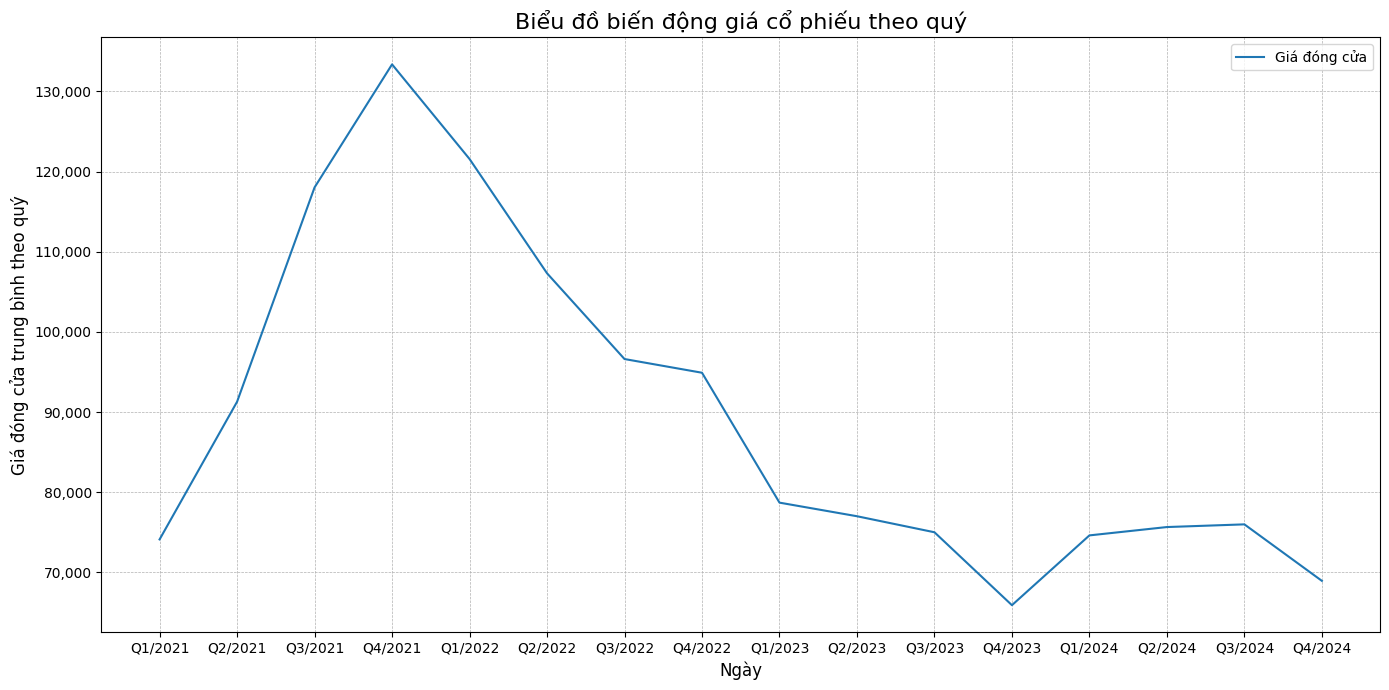

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df_final.index, df_final['close_avg'], label='Giá đóng cửa')

plt.title('Biểu đồ biến động giá cổ phiếu theo quý', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá đóng cửa trung bình theo quý', fontsize=12)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()

### Tương quan giữa các chỉ số tài chính

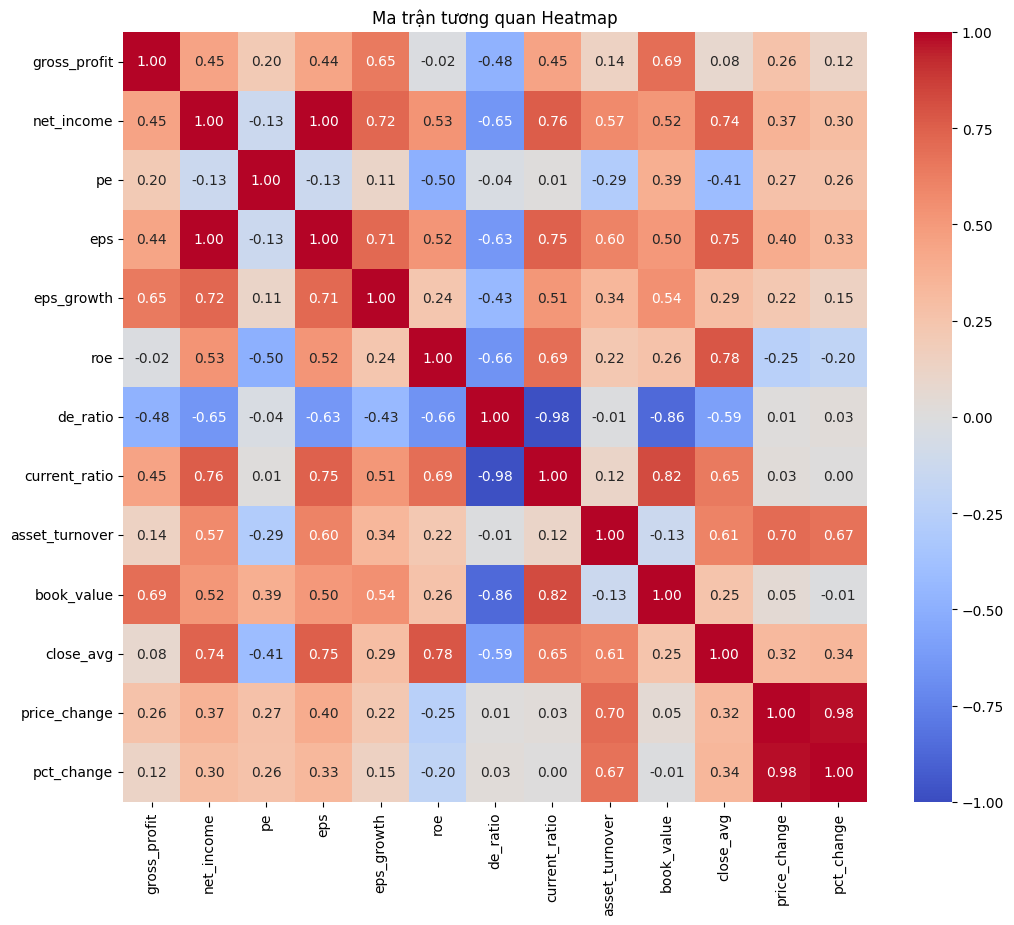

In [11]:
correlation_matrix = df_final.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan Heatmap')
plt.show()

In [12]:
# Tương quan các chỉ số với giá đóng cửa trung bình theo quý
price_correlation = correlation_matrix['close_avg'].sort_values(ascending=False)
price_correlation

close_avg         1.000000
roe               0.782543
eps               0.750923
net_income        0.738487
current_ratio     0.646866
asset_turnover    0.605383
pct_change        0.342216
price_change      0.322922
eps_growth        0.290891
book_value        0.250778
gross_profit      0.082943
pe               -0.409967
de_ratio         -0.587273
Name: close_avg, dtype: float64

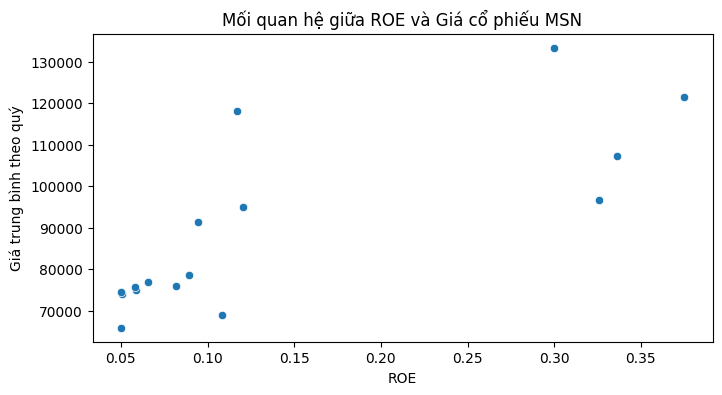

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df_final, x='roe', y='close_avg')
plt.title('Mối quan hệ giữa ROE và Giá cổ phiếu MSN')
plt.xlabel('ROE')
plt.ylabel('Giá trung bình theo quý')
plt.show()